In [16]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=2)

%matplotlib inline

In [17]:
recipies=pd.read_csv('data.csv')
print(recipies.head())
# print(recipies)

      type  flour  milk  sugar  butter  egg  baking powder  vanilla  salt
0  cupcake     33    34      4      40   34              8        2    21
1  cupcake     21    44      0      12   18             32       43    36
2   muffin     93    75     98      60   92             98       66    72
3  cupcake     14     9      0      33    6             43       23    35
4  cupcake      9    47     37      32    7             37       29    31


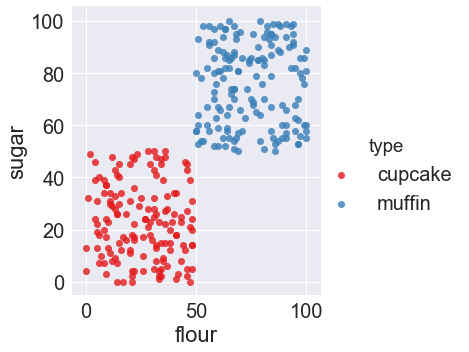

In [18]:
# sns.lmplot("flour","sugar",data=recipies,markers='*',size=6,order=0,scatter=True,fit_reg=False)
sns.lmplot(x="flour",
           y="sugar",
           data=recipies,
#            markers=["o"],
           hue='type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={'s':50},
#            col='type'
           
          )
# plt.show()


In [19]:
type_label=np.where(recipies['type']=='muffin',0,1)
print(type_label)
recipie_features=recipies.columns.values[1:].tolist()
print(recipie_features)
ingredients= recipies[['flour','sugar']].values
# .tolist()
# print(ingredients)

[1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1
 0 1 1 1]
['flour', 'milk', 'sugar', 'butter', 'egg', 'baking powder', 'vanilla', 'salt']


In [20]:
model=svm.SVC(kernel='linear',probability=True)
model.fit(ingredients,type_label)
# print(model.decision_function)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
# print(model.predict([[60,60]]))
def check(flour,milk):
    
    if(model.predict([[flour,milk]])==0):
        return 'muffin',model.predict_proba([[flour,milk]])
    else:
        return 'cupcake',model.predict_proba([[flour,milk]])


In [22]:
#  from create_data import create_test_data

# create_test_data()
test_data=pd.read_csv('test.csv')
l=test_data[['type','flour','milk']].values

for data in l:
    type=data[0]
    flour=data[1]
    milk=data[2]
    res=check(flour,milk)
    prediction=res[0]
    prob=res[1]
#     print("{}\t{}\t{}\t:\t{}".format(prediction==type,prob, type,prediction))
#     if(prediction==False):
    if prediction==type:
        print('{} flour:{} milk:{} {}({})'.format(prediction==type,flour,milk,prediction,type))
    else:
        print('\t\t\t\t\t{} flour:{} milk:{} {}({})'.format(prediction==type,flour,milk,prediction,type))


True flour:33 milk:34 cupcake(cupcake)
True flour:90 milk:84 muffin(muffin)
True flour:52 milk:71 muffin(muffin)
True flour:21 milk:44 cupcake(cupcake)
True flour:62 milk:68 muffin(muffin)
True flour:93 milk:75 muffin(muffin)
True flour:92 milk:98 muffin(muffin)
True flour:22 milk:30 cupcake(cupcake)
True flour:59 milk:50 muffin(muffin)
True flour:93 milk:73 muffin(muffin)
True flour:9 milk:47 cupcake(cupcake)
True flour:87 milk:79 muffin(muffin)
True flour:31 milk:25 cupcake(cupcake)
True flour:82 milk:81 muffin(muffin)
True flour:65 milk:97 muffin(muffin)
True flour:5 milk:20 cupcake(cupcake)
True flour:40 milk:29 cupcake(cupcake)
True flour:22 milk:3 cupcake(cupcake)
True flour:74 milk:66 muffin(muffin)
True flour:72 milk:79 muffin(muffin)
True flour:45 milk:34 cupcake(cupcake)
True flour:57 milk:98 muffin(muffin)
True flour:4 milk:32 cupcake(cupcake)
True flour:99 milk:79 muffin(muffin)
True flour:61 milk:53 muffin(muffin)
True flour:20 milk:48 cupcake(cupcake)
True flour:34 milk:3